# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Amirmasoud Bagheri
2.   Student Number: 400203616


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [312]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [313]:
dataset = pd.read_csv("data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
dataset["Unnamed: 0"] = dataset['X']
dataset['X'] = 1
dataset = dataset.to_numpy()

train = dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]

x_train = train[: , :2]
y_train = train[: , 2]


x_test = test[: , :2]
y_test = test[: , 2]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [314]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

m = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)),np.dot(x_train.T,y_train))

In [315]:
predicted_train_y = m[0] * x_train[:,0] + m[1]
predicted_test_y = m[0] * x_test[:,0] + m[1]


    
    
train_error = np.linalg.norm(np.add(y_train , (-1)*predicted_train_y))**2/len(y_train)
test_error = np.linalg.norm(np.add(y_test , (-1)*predicted_test_y))**2/len(y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.354495119213003


In [316]:
print(test_error/y_test.mean())
print(train_error/y_train.mean())

-1.8784584992550692
-1.5825915830481487


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

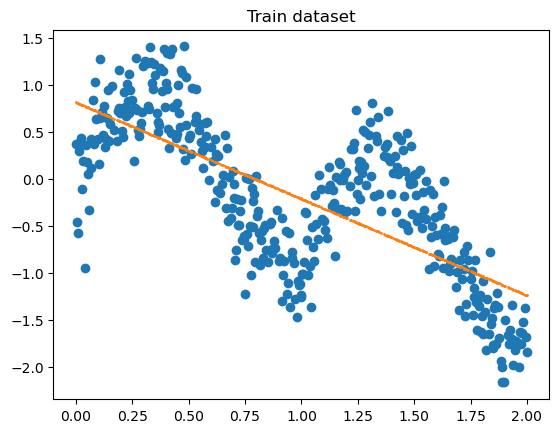

In [317]:
plt.scatter(x_train[:,0], y_train)
plt.scatter(x_train[:,0], m[0]*x_train[:,0] + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

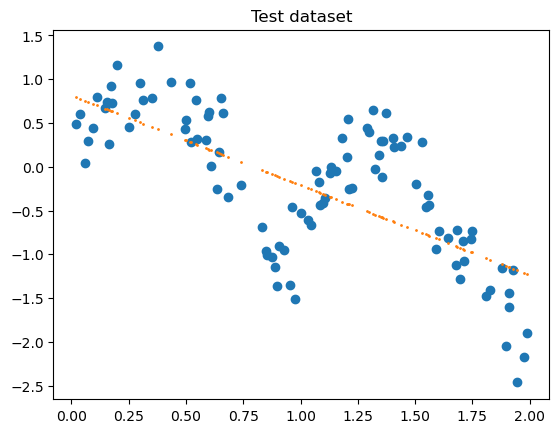

In [318]:
plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:,0], m[0]*x_test[:,0] + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

میزان خطا، در دیتای آموزشی و دیتای تست، نسبت به میانگین برچسب ها در این دو دسته، عدد تقریبی 158٪ و 187٪ است که اصلا قابل قبول نیست

همچنین خط کشیده شده در بین دیتاهای تست و اموزش نشان میدهد که این خط به خوبی نمیتواند بیانگر رابطه ی بین برچسب و دیتا باشد
رفتار دیتا رفتار غیر خطی و شبیه به حرف انگلیسی M است
در حالی که ما فضای فرضیه را خطی در نظر گرفتیم و در بین خطوط دنبال بهترین خط برای توجیه رفتار دیتا گشتیم

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

بله زیرا رفتار دیتا به صورت ناحیه بندی شده رفتار خطی دارد 
لذا انتظار می رود که در صورت انتخاب مقدار مناسب برای اتا، Locally Weighted Linear Regression مدل بهتری را برای رفتار داده ارائه کند
در واقع رفتار تابع به طور کلی غیر خطی است، اما نسبت به نواحی کوچکتر تابع رفتار خطی دارد و لذا می توان با تمرکز به صورت محلی روی نواحی مختلف به وسیله یLocally Weighted Linear Regression و انتخاب مقدار اتای مناسب رفتار داده را مدل کرد 

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [319]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.dot((xi-the_query_point),(xi-the_query_point).T)/-2*(hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [320]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = train_X
    qx = query_x
    W = get_weight_matrix(qx, X, hyperparameter)
    train_Y = train_Y.reshape(-1,1)

    theta = np.dot(np.linalg.inv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),train_Y))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [321]:
hyperparameter = 100
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
predicted_test = np.array(predicted_test).reshape(100,)
error = np.linalg.norm(np.add(y_test , (-1)*predicted_test))**2/len(y_test)
print(f"MSE test error: {error}")

MSE test error: 0.09575447403654114


Text(0.5, 1.0, 'Test dataset')

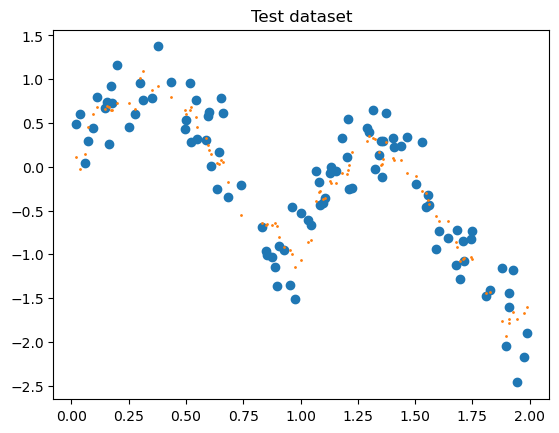

In [322]:
plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:,0], predicted_test, s=1)
plt.title("Test dataset")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

بله خطا به طرز محسوسی کاهش پیدا کرد و از عدد 0.35 به عدد 0.09  برروی دیتای تست کاهش پیدا کرد
طبعا نمودار رسم شده از پیش بینی مدل از دیتای تست و مقایسه ی آن با مدل خطی قبلی نیز نمایانگر همین موضوع می باشد
در حال حاضر نسبت خطا به میانگین برچسبها عدد 

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

### Part10:
Implementing the `KNN model`.

In [323]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2) # implement the distance function
        return distance


    def return_nn_ids(self, x):
        distances = []
        for i , xi in enumerate(self.X):
            distances.append(self.distance(x,xi))
        distances = np.array(distances)
        indices = distances.argsort()[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices].mean()
        return predicted_y

In [324]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    predicted_y = np.array(predicted_y)
    error = np.linalg.norm(np.add(y_test , (-1)*predicted_y))**2/len(y_test)
    return error, predicted_y

In [325]:
#cross-validation
import random
K_Values = [3,5,10,20,50,100]
K_Loss = []
loss = 0
for k in K_Values:
    errors = []
    for j in range(5):
        a = random.sample(range(0, len(dataset)),int(len(dataset) * 0.8))
        train_cv = np.take(dataset, a, axis = 0)
        test_cv = np.delete(dataset, a , axis = 0)
        x_train_cv = train[: , :2]
        y_train_cv = train[: , 2]
        x_test_cv = test[: , :2]
        y_test_cv = test[: , 2]
        error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
        errors.append(error_knn)
    K_error = max(errors)
    K_Loss.append(K_error)
    
print(K_Values)
print(K_Loss)

[3, 5, 10, 20, 50, 100]
[0.10301733310578777, 0.10056554154981058, 0.10018472883638241, 0.09727283582096549, 0.10434760348074565, 0.16853887878874482]


so best k is 20

In [326]:
k = 20
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09727283582096549


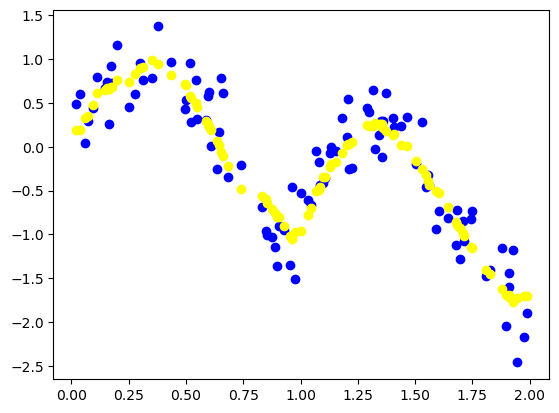

In [327]:
plt.scatter(x_test[:,0], y_test, c="blue")
plt.scatter(x_test[:,0], predicted_y, c="yellow")

In [328]:
print(K_Values)
print(K_Loss)

[3, 5, 10, 20, 50, 100]
[0.10301733310578777, 0.10056554154981058, 0.10018472883638241, 0.09727283582096549, 0.10434760348074565, 0.16853887878874482]


so best k is 20

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

این مدل نسبت به مدل دوم، کمی ضعیف تر عملکرد اما تقریبا در همان اندازه ی مدل قبلی است
میزان خطا در این مدل 0.097 است که در مدل قبلی 0.095 بود